# Введение в нейронные сети

## Урок 7. Детектирование объектов

### Практическое задание

Сделайте краткий обзор любой архитектуры для object detection. Проведите анализ: чем отличается выбранная вами архитектура нейронной сети от других? В чём плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении этой архитектуры на практике?

### Решение - Nano-YOLO

#### Вступление

С развитием технологий растут объёмы вычислительных мощностей, что позволяет обучать всё более сложные архитектуры нейронных сетей. Однако не всегда усложнение является залогом успеха. Так например авторы нейросети ***Nano-YOLO*** решили адаптировать алгоритм ***YOLO*** для запуска на мобильных устройствах, где вычислительные мощности серьёзно ограничены, а также требуется обработка изображений в режиме реального времени.

***
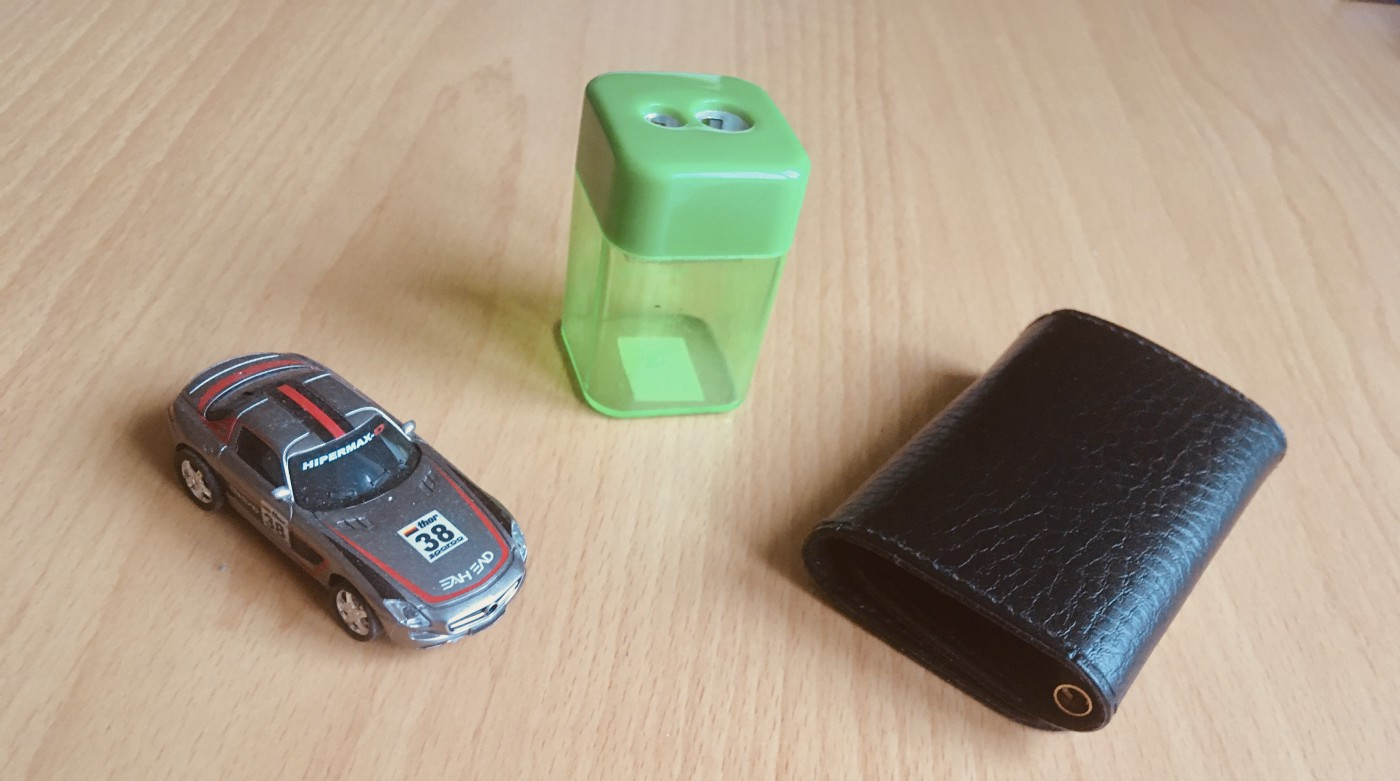
***
Одна из ***Nano-YOLO*** обучалась на трёх простых предметах: игрушечная машинка, точилка для карандашей и небольшой чехол для инструмента.
***

Основной задумкой было упрощение алгоритмов существующей нейросети ***YOLO*** с сохранением приемлемой точности прогнозирования. В конечном итоге разработанная модель получилась миниатюрной: она работала с изображениями размерностью 112*112 пикселей и сама имела вес около 4 MB.

#### Отличительные особенности

В отличии от своего предка, ***Nano-YOLO*** разбивала исходное изображение при помощи сетки 7 на 7, то есть, на 49 ячеек. Данного количества оказалось достаточно, чтобы в каждой ячейке оказывалось достаточно важной информации для дальнейшей обработки.

***
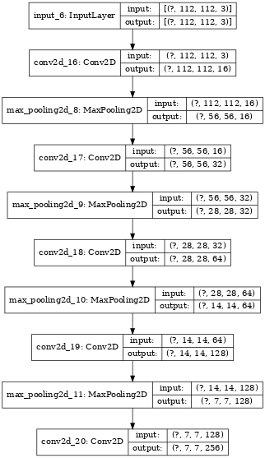
***
Архитектура первой части сети для получения 49 ячеек.
***

Далее разработчики придумали использовать дополнительные полносвязные слои, чтобы прогнозировать важность каждой отдельной ячейки. После свёртки в качестве признаков использовались лишь те, которые были получены из приоритетных ячеек. Этого оказалось достаточно для приемлемого качества прогноза, но модель стала более чувствительна к качеству данных.

После этого использовался набор полносвязных слоёв для классификации обнаруженного объекта. В целях оптимизации модель была упрощена - она могла определять только один класс на фото или "пустой" класс, отсутствие объектов.

Стоит также отметить, что в составе нейронной сети присутствовали блоки <code>dropout</code> с вероятностью потерь до 0.6. Несмотря на это, могла улавливать наиболее важную информацию и не переобучаться.

#### Функция потерь

Функция потерь формировалась из нескольких составляющих:

1. Кросс-энтропия для борьбы с предсказанием неверного класса. Данная функция хорошо себя проявила, так как одним из классов был "пустой" класс для случая отсутствия объектов.


2. Для нивелирования ошибки расположения bounding box авторы провели ряд экспериментов и обнаружили, что наиболее важным является предсказание центра объекта, а не всего контура. Это позволяет минимизировать функцию потерь при минимальных вычислительных затратах при обучении модели. В качестве функции потерь для этой составляющей выбрали Евклидову метрику между истинным центром объекта и рассчитанным центром спрогнозированного bounding box.


3. Третьей составляющей стала функция минимизации ложной уверенности модели в конкретной ячейке. Эта функция позволила обучить слои, ответственные за выбор корректных ячеек. Модель получала штраф, если учитывала пустые ячейки. Однако минимизация данной метрики оказалась тяжёлой задачей ля миниатюрной нейросети.

***
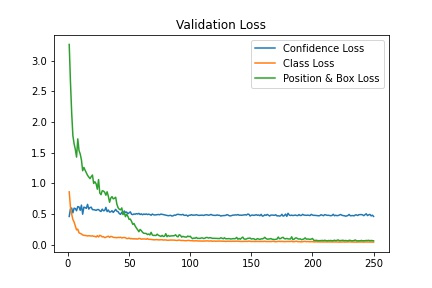
***
Итоговая функция потерь представляла собой взвешенную сумму трёх составляющих.
***

В качестве метода оптимизации использовался градиентный спуск при помощи оптимизатора "ADAM". Данный метод является одним из наиболее эффективных, а также он показал хорошее быстродействие при небольшом размере сети.

#### Валидация

Для обучения модели были подготовлены 6000 изображений и после 250 эпох произошло затухание градиента - признак, что дальнейшее обучение невозможно..

***
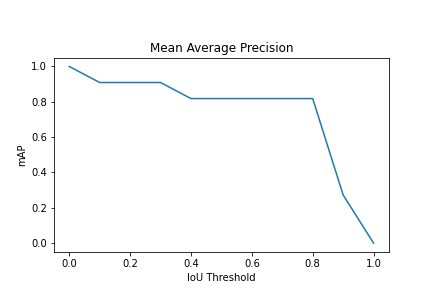
***
Впоследствии доработанная модель продемонстрировала хорошую метрику качества mAP = 0.81.
***

Также обученная модель достигла желаемого быстродействия: на портативных устройствах она могла работать практически в реальном времени.

***
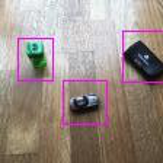
***
Композиция моделей может работать с несколькими классами.
***

***Nano-YOLO*** не всегда справлялась с более сложными объектами, зато она является доказательством масштабируемости и возможности компромисса между качеством и миниатюрностью

#### Источники

1. https://arxiv.org/abs/1910.01271
2. https://github.com/ardeal/yolo_nano
3. https://towardsdatascience.com/nano-yolo-insights-on-the-multi-part-loss-function-of-a-simplified-yolo-v1-5104bdee7ff1
4. https://www.arxiv-vanity.com/papers/1910.01271/